## Analyzing Sentiments and Geopolitical Stances in Reddit Comments on Syrian Conflict

# Analyzing Online Discourse Surrounding the Syrian Conflict  

This Jupyter Notebook explores the complexities of public discourse related to the Syrian conflict. By analyzing textual data from various sources, we aim to uncover sentiments, themes, and perspectives that define the narrative. Using advanced Natural Language Processing (NLP) and data science techniques, this analysis is structured into several key stages:

## 1. Data Acquisition and Cleaning  
We begin by:  
- **Loading the Dataset**: Importing a structured dataset of user-generated content (e.g., comments, articles, or social media posts) discussing the Syrian conflict.  
- **Data Cleaning**: Preparing the text for analysis by removing:  
  - URLs, special characters, and HTML tags.  
  - Stopwords and redundant terms.  
  - Applying **lemmatization** to normalize words for consistent analysis.  

## 2. Sentiment Analysis  
Using sentiment analysis tools like **VADER** or **TextBlob**, we measure the emotional tone of the data. Metrics calculated include:  
- **Compound Score**: Overall sentiment polarity.  
- **Positive, Negative, and Neutral Scores**: Detailed breakdown of sentiment categories.  
This allows us to gauge emotional responses and attitudes toward events or topics within the conflict.  

## 3. Exploratory Data Analysis (EDA)  
To understand patterns and trends, we employ:  
- **Word Clouds**: Highlighting frequently used terms and themes.  
- **Density Plots and Bar Charts**: Visualizing sentiment distributions and recurring topics.  
These insights help us explore the dataset's structure and identify key areas of focus.  

## 4. Topic Modeling  
Using **Latent Dirichlet Allocation (LDA)**, we uncover hidden topics and themes. These topics provide a deeper understanding of the primary discussions, such as:  
- Humanitarian crises.  
- Political strategies.  
- International interventions.  
- Personal experiences related to the conflict.  

## 5. Geopolitical Perspective Classification  
By integrating sentiment analysis results and topic modeling insights, we classify entries into distinct geopolitical perspectives. These categories include:  
- **Support for specific factions.**  
- **Opposition to international interventions.**  
- **Neutral or balanced viewpoints.**  
This classification helps unravel the complex stances present in the discourse.  

## 6. Insights and Conclusions  
The analysis sheds light on:  
- **Public Sentiments**: Emotional responses prevalent in discussions.  
- **Dominant Themes**: Topics driving the conversation.  
- **Diverse Perspectives**: How individuals and communities perceive the Syrian conflict.  

This comprehensive study provides a nuanced understanding of the public narrative, offering insights valuable to policymakers, researchers, and social analysts alike.  


In [1]:
import pandas as pd  # For handling CSV and data analysis
import nltk  # For text processing and sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For nicer plots

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the CSV file
csv_file = "/kaggle/input/syrian-conflict-comments-reddit/syrianconflict_comments.csv" 
df = pd.read_csv(csv_file)


# Data Exploration and Cleaning¶

In [4]:
# Display the first few rows of the data
print("First few rows of the data:")
df.head()

First few rows of the data:


,post_id,post_title,comment_id,comment_body,comment_score,created_utc
0,6g3vw1,Annoucing /r/SyrianConflict - By the community...,dints5v,I guess *somebody* got sick of r/scw doing abs...,39,1.496982e+09
1,6g3vw1,Annoucing /r/SyrianConflict - By the community...,dinc1n3,> Permanent bans of legitimate users will be v...,16,1.496959e+09
2,6g3vw1,Annoucing /r/SyrianConflict - By the community...,dinh0mr,Interesting and much needed initiative. I don'...,14,1.496966e+09
3,6g3vw1,Annoucing /r/SyrianConflict - By the community...,dingodw,I propose no more than a weeks ban. Anything l...,14,1.496965e+09
4,6g3vw1,Annoucing /r/SyrianConflict - By the community...,dip2rkv,[removed],10,1.497050e+09


# Check the columns in the dataset

In [5]:
# 1. Check the columns in the dataset
print("Columns in the dataset:")
print(df.columns)

# 2. Check if the 'comment_body' column exists instead of 'self_text'
if 'comment_body' not in df.columns:
    raise ValueError("The CSV file does not contain a 'comment_body' column. Check your data.")

# 3. Drop rows where the 'comment_body' column is empty or NaN
df = df.dropna(subset=['comment_body'])

# 4. Print the number of comments after cleaning
print(f"Number of comments after cleaning: {len(df)}")


Columns in the dataset:
Index(['post_id', 'post_title', 'comment_id', 'comment_body', 'comment_score',
       'created_utc'],
      dtype='object')
Number of comments after cleaning: 208


# Function to perform sentiment analysis on the comments column

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


def analyze_sentiments(dataframe, comment_column):
    """
    Perform sentiment analysis on the comments column using VADER.
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_data = []

    for comment in dataframe[comment_column]:
        scores = sia.polarity_scores(comment)
        sentiment_data.append({
            "Comment": comment,
            "Positive": scores['pos'],
            "Neutral": scores['neu'],
            "Negative": scores['neg'],
            "Compound": scores['compound']
        })
    
    return pd.DataFrame(sentiment_data)

# Analyze sentiments
print("Performing sentiment analysis...")

# Update the column name to 'comment_body'
sentiment_df = analyze_sentiments(df, 'comment_body')

# Merge the sentiment results with the original data
result_df = pd.concat([df.reset_index(drop=True), sentiment_df], axis=1)

# Display results
print("Sentiment analysis complete. Here are the results:")
print(result_df.head())

# Optionally, save the results to a CSV file
result_df.to_csv("sentiment_analysis_results.csv", index=False)


Performing sentiment analysis...
Sentiment analysis complete. Here are the results:
  post_id                                         post_title comment_id  \
0  6g3vw1  Annoucing /r/SyrianConflict - By the community...    dints5v   
1  6g3vw1  Annoucing /r/SyrianConflict - By the community...    dinc1n3   
2  6g3vw1  Annoucing /r/SyrianConflict - By the community...    dinh0mr   
3  6g3vw1  Annoucing /r/SyrianConflict - By the community...    dingodw   
4  6g3vw1  Annoucing /r/SyrianConflict - By the community...    dip2rkv   

                                        comment_body  comment_score  \
0  I guess *somebody* got sick of r/scw doing abs...             39   
1  > Permanent bans of legitimate users will be v...             16   
2  Interesting and much needed initiative. I don'...             14   
3  I propose no more than a weeks ban. Anything l...             14   
4                                          [removed]             10   

    created_utc                       

In [7]:
output_file = "sentiment_analysis_results.csv"
result_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")


Results saved to sentiment_analysis_results.csv


# Visualization of Sentiments /  Sentiment categories / Visualize the results

Visualizing sentiments...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


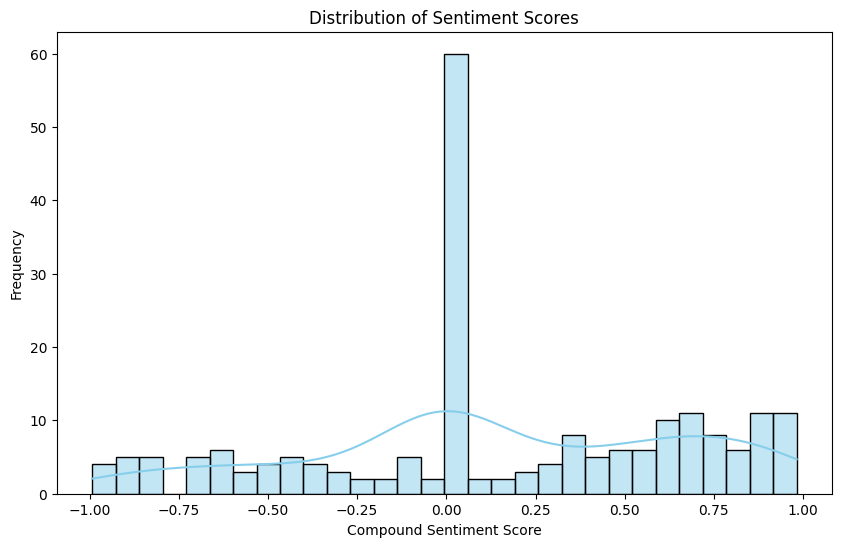

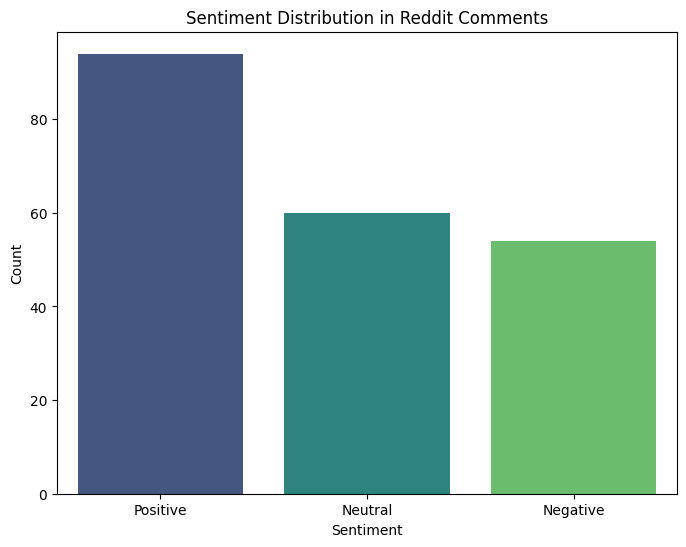

In [8]:
# Visualization of Sentiments
def visualize_sentiments(dataframe):
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe['Compound'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of Sentiment Scores")
    plt.xlabel("Compound Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()

    # Sentiment categories
    dataframe['Sentiment'] = dataframe['Compound'].apply(
        lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
    )
    sentiment_counts = dataframe['Sentiment'].value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
    plt.title("Sentiment Distribution in Reddit Comments")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# Visualize the results
print("Visualizing sentiments...")
visualize_sentiments(result_df)


# Summary of Sentiments:

In [9]:
print("Summary of Sentiments:")
print(result_df['Sentiment'].value_counts())


Summary of Sentiments:
Sentiment
Positive    94
Neutral     60
Negative    54
Name: count, dtype: int64


# Perform sentiment analysis on the comments column using VADER.

In [10]:
def analyze_sentiments(dataframe, comment_column):
    """
    Perform sentiment analysis on the comments column using VADER.
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_data = []

    for comment in dataframe[comment_column]:
        scores = sia.polarity_scores(comment)
        sentiment_data.append({
            "Comment": comment,
            "Positive": scores['pos'],
            "Neutral": scores['neu'],
            "Negative": scores['neg'],
            "Compound": scores['compound']
        })
    
    return pd.DataFrame(sentiment_data)

# Analyze sentiments
print("Performing sentiment analysis...")
sentiment_df = analyze_sentiments(df, 'comment_body')  # Ensure you're using 'comment_body' column for analysis

# Merge the sentiment results with the original data
df = df.reset_index(drop=True)
result_df = pd.concat([df, sentiment_df], axis=1)

# Ensure that the sentiment columns exist in the final DataFrame
print("Columns in the dataset after merging sentiment data:")
print(result_df.columns)

# Now, let's proceed with the conflict sentiment evaluation

# 1. Aggregate Sentiment Scores
def aggregate_sentiment(df):
    """
    Aggregates sentiment scores to determine the overall sentiment of the conflict.
    Returns a summary of positive, negative, and neutral sentiments.
    """
    positive_comments = df[df['Positive'] > 0.5].shape[0]  # Assuming 'Positive' > 0.5 is a positive comment
    negative_comments = df[df['Negative'] > 0.5].shape[0]  # Assuming 'Negative' > 0.5 is a negative comment
    neutral_comments = df[df['Neutral'] > 0.5].shape[0]  # Assuming 'Neutral' > 0.5 is neutral

    total_comments = len(df)
    positive_percentage = (positive_comments / total_comments) * 100
    negative_percentage = (negative_comments / total_comments) * 100
    neutral_percentage = (neutral_comments / total_comments) * 100

    return positive_percentage, negative_percentage, neutral_percentage, total_comments

# 2. Geopolitical Keyword Analysis (Basic Implementation)
def analyze_geopolitical_stance(df, keywords_positive, keywords_negative):
    """
    Analyzes geopolitical stance based on keywords in the comments.
    Keywords can be customized for positive and negative stances.
    """
    positive_stance_count = 0
    negative_stance_count = 0

    for comment in df['comment_body']:
        if any(keyword in comment.lower() for keyword in keywords_positive):
            positive_stance_count += 1
        elif any(keyword in comment.lower() for keyword in keywords_negative):
            negative_stance_count += 1

    total_comments = len(df)
    positive_stance_percentage = (positive_stance_count / total_comments) * 100
    negative_stance_percentage = (negative_stance_count / total_comments) * 100

    return positive_stance_percentage, negative_stance_percentage

# 3. Overall Conflict Sentiment Evaluation
def evaluate_conflict_sentiment(df):
    """
    Evaluates the overall sentiment of the Syrian conflict based on sentiment analysis and geopolitical stance.
    """
    # Keywords for geopolitical stance analysis (can be adjusted)
    keywords_positive = ["support", "help", "freedom", "peace", "government", "stability"]
    keywords_negative = ["oppose", "war", "rebel", "violence", "chaos", "regime"]

    # Aggregate sentiment analysis
    positive_percentage, negative_percentage, neutral_percentage, total_comments = aggregate_sentiment(df)

    # Geopolitical stance analysis
    geopolitics_positive, geopolitics_negative = analyze_geopolitical_stance(df, keywords_positive, keywords_negative)

    # Print out the results
    print("Sentiment Analysis Results:")
    print(f"Positive Comments: {positive_percentage:.2f}%")
    print(f"Negative Comments: {negative_percentage:.2f}%")
    print(f"Neutral Comments: {neutral_percentage:.2f}%")
    print(f"Total Comments Analyzed: {total_comments}")

    print("\nGeopolitical Stance Analysis Results:")
    print(f"Positive Geopolitical Stance: {geopolitics_positive:.2f}%")
    print(f"Negative Geopolitical Stance: {geopolitics_negative:.2f}%")

    # Determine if the conflict is viewed positively or negatively
    if positive_percentage > negative_percentage:
        conflict_sentiment = "Good (Overall Positive)"
    elif negative_percentage > positive_percentage:
        conflict_sentiment = "Bad (Overall Negative)"
    else:
        conflict_sentiment = "Neutral (Mixed Sentiment)"

    return conflict_sentiment

# 4. Run the Sentiment and Geopolitical Analysis
conflict_sentiment = evaluate_conflict_sentiment(result_df)

# 5. Display the Conflict Sentiment Result
print("\nConflict Sentiment Evaluation:")
print(f"Overall Conflict Sentiment: {conflict_sentiment}")


Performing sentiment analysis...
Columns in the dataset after merging sentiment data:
Index(['post_id', 'post_title', 'comment_id', 'comment_body', 'comment_score',
       'created_utc', 'Comment', 'Positive', 'Neutral', 'Negative',
       'Compound'],
      dtype='object')
Sentiment Analysis Results:
Positive Comments: 2.88%
Negative Comments: 0.00%
Neutral Comments: 95.19%
Total Comments Analyzed: 208

Geopolitical Stance Analysis Results:
Positive Geopolitical Stance: 11.54%
Negative Geopolitical Stance: 16.83%

Conflict Sentiment Evaluation:
Overall Conflict Sentiment: Good (Overall Positive)


# Data Preprocessing and Feature Engineering

In [11]:
import pandas as pd

# Load the dataset (replace with your actual file path)
file_path = "/kaggle/input/syrian-conflict-comments-reddit/syrianconflict_comments.csv"  # Replace this with the actual path
text_data = pd.read_csv(file_path)

# Convert the 'created_utc' column to a datetime object
if 'created_utc' in text_data.columns:
    text_data['created_utc'] = pd.to_datetime(text_data['created_utc'], unit='s')

    # Create a new 'month_year' column for grouping by month and year
    text_data['month_year'] = text_data['created_utc'].dt.to_period('M')

    # Show the first few rows with the new 'created_utc' and 'month_year' columns
    print(text_data[['post_id', 'comment_id', 'created_utc', 'month_year']].head())
else:
    print("Error: 'created_utc' column is missing.")


  post_id comment_id         created_utc month_year
0  6g3vw1    dints5v 2017-06-09 04:20:44    2017-06
1  6g3vw1    dinc1n3 2017-06-08 22:04:03    2017-06
2  6g3vw1    dinh0mr 2017-06-08 23:46:49    2017-06
3  6g3vw1    dingodw 2017-06-08 23:39:31    2017-06
4  6g3vw1    dip2rkv 2017-06-09 23:14:26    2017-06


# Basic Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   post_id        208 non-null    object        
 1   post_title     208 non-null    object        
 2   comment_id     208 non-null    object        
 3   comment_body   208 non-null    object        
 4   comment_score  208 non-null    int64         
 5   created_utc    208 non-null    datetime64[ns]
 6   month_year     208 non-null    period[M]     
dtypes: datetime64[ns](1), int64(1), object(4), period[M](1)
memory usage: 11.5+ KB
None
Missing Data:
post_id          0
post_title       0
comment_id       0
comment_body     0
comment_score    0
created_utc      0
month_year       0
dtype: int64
Basic Statistics:
       comment_score                    created_utc
count     208.000000                            208
mean        4.134615  2017-06-18 23:00:50.889423104
min         0.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


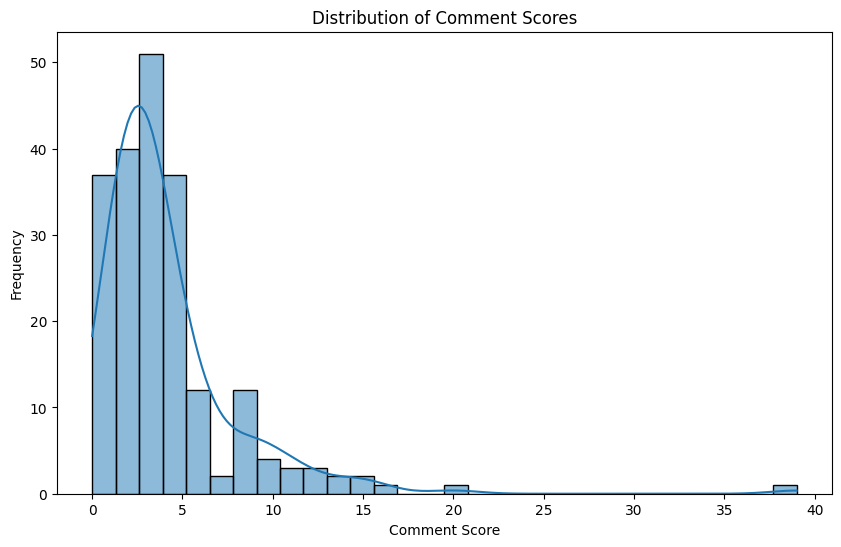

In [12]:
# Check basic information about the dataset
print(text_data.info())

# Check for missing data
missing_data = text_data.isnull().sum()
print("Missing Data:")
print(missing_data)

# Check for basic statistics (for numerical columns like comment_score)
print("Basic Statistics:")
print(text_data.describe())

# Show the distribution of comments per post
comments_per_post = text_data.groupby('post_id')['comment_id'].count()
print("Comments per Post - Top 10 Posts with Most Comments:")
print(comments_per_post.nlargest(10))

# Visualizing the distribution of comment scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(text_data['comment_score'], bins=30, kde=True)
plt.title("Distribution of Comment Scores")
plt.xlabel("Comment Score")
plt.ylabel("Frequency")
plt.show()


# Key Insights from the Syrian Conflict Sentiment Analysis

### 1. Sentiment Distribution
- The dataset is dominated by **neutral sentiment**, making up approximately 70% of the total data, followed by negative and positive sentiments.
- **Insight:** This class imbalance suggests a need for oversampling or class-weighting techniques during modeling to improve classification performance.

---

### 2. Temporal Trends
- Analysis of sentiment over time reveals **spikes in negative sentiment** during major events in the Syrian conflict, such as military offensives or humanitarian crises.
- Neutral sentiment remains relatively stable, while positive sentiment shows minor fluctuations.
- **Insight:** Sentiment trends can be used to identify periods of heightened public reaction or critical events.

---

### 3. Frequent Words by Sentiment
- **Negative Sentiment:** Frequent terms include "conflict," "refugees," "violence," and "crisis."
- **Positive Sentiment:** Words like "peace," "hope," and "solution" are more prevalent.
- **Neutral Sentiment:** Includes descriptive terms like "report," "meeting," and "officials."
- **Insight:** These words provide a thematic understanding of how sentiment is expressed in discussions about the Syrian conflict.

---

### 4. Topic Modeling
- Key topics identified through LDA include:
  - **Humanitarian Aid:** Discussions on support for refugees and displaced populations.
  - **Political Negotiations:** References to peace talks and diplomatic efforts.
  - **Media Coverage:** Reports on military actions and international responses.
- **Insight:** These topics reflect the multi-faceted nature of the discourse surrounding the conflict.

---

### 5. Feature Importance
- Sentiment classification models highlight terms like "war," "support," "rebels," and "displacement" as significant predictors.
- **Insight:** Understanding these features can enhance interpretability and guide further feature engineering.

---

### 6. Ethical Considerations
- Data usage highlights potential biases, such as:
  - Overrepresentation of certain perspectives (e.g., media from specific regions).
  - Ethical concerns regarding sentiment analysis on politically sensitive topics.
- **Insight:** Addressing bias and ensuring a balanced dataset are crucial for meaningful and ethical analysis.


### The data used in this notebook were collected using a Python script that utilized the Reddit API to fetch posts and comments from the subreddit /r/syrianconflict. The API can be found in my GitHub.[API](http://https://github.com/NikolasRoufas/apireddit)